Relationship with type.ipnyb

    This code relies on the music_mood_analysis.csv file created in the previous code. That file contains the mood analysis results for the user's Spotify listening habits.

Necessary Imports:

    1. pandas: For reading the music_mood_analysis.csv file and manipulating the data.
    2. matplotlib.pyplot: For creating the correlation plot.
    3. numpy: For numerical operations like calculating correlation.
    4. scipy.stats: To compute a trend line using linear regression.
    5. datetime: For handling date-based filtering.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from datetime import datetime


Mood Mapping:

    Each mood is assigned a numerical value:
    happy: 5 (highest energy/mood level).
    melancholic: 1 (lowest energy/mood level).
    Other moods fall in between.
    This mapping is used to convert the text-based dominant_mood column in the CSV to numerical values for correlation analysis.

Relationship with Past Code:

    The dominant_mood column in the music_mood_analysis.csv file contains textual mood labels derived from the previous code. This mapping bridges the textual data with numerical correlation analysis.

In [2]:
MOOD_MAPPING = {
    'happy': 5,
    'energetic': 4,
    'intense': 2,
    'melancholic': 1,
    'balanced': 3
}

Correlation Plot Function:

    Converts moods into numerical values using MOOD_MAPPING.
    Filters data to the time range November 2023 to November 2024.
    Assigns month numbers (1 for November 2023, 2 for December 2023, etc.).
    Calculates a trend line using stats.linregress for linear regression.

Visualization Logic:

    Creates a scatter plot of months vs. mood values.
    Annotates each point with the track name for clarity.
    Adds a trend line to visualize the correlation.

X-Axis Labels, Y-Axis Mapping, and Saving:

    Formats x-axis labels for the months (e.g., Nov 23, Dec 23).
    Maps y-axis ticks to mood labels (happy, energetic, etc.).
    Adjusts plot limits and layout.
    

Relationship with Past Code:

    1.Month is a column from the music_mood_analysis.csv file that the previous code populated with month data (2023-11, etc.).
    2.The analysis window (Nov 2023 - Nov 2024) ensures consistency with a specific listening period.

    3.trackName column from the music_mood_analysis.csv file is used for annotations.
    4.The plot shows how mood values change across months based on the dominant_mood column.

    5.Month data from the music_mood_analysis.csv file ensures proper x-axis labeling.

In [3]:
def create_month_mood_correlation_plot(df_analysis):
    """
    Create correlation plot between months and song moods
    """
    df_analysis['mood_value'] = df_analysis['dominant_mood'].map(MOOD_MAPPING)
    
    df_analysis['date'] = pd.to_datetime(df_analysis['Month'])
    df_analysis = df_analysis[
        (df_analysis['date'] >= '2023-11-01') & 
        (df_analysis['date'] <= '2024-11-30')
    ]
    
    df_analysis['month_num'] = range(1, len(df_analysis) + 1)
    
    
    x = df_analysis['month_num'].values
    y = df_analysis['mood_value'].values
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    line = slope * x + intercept

        # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Scatter plot with labels
    plt.scatter(x, y, color='black', s=50)
    
    # Add track names as annotations
    for i, txt in enumerate(df_analysis['trackName']):
        plt.annotate(txt, (x[i], y[i]), fontsize=8, alpha=0.7,
                    xytext=(5, 5), textcoords='offset points')
    
    # Trend line
    plt.plot(x, line, color='blue', linewidth=2)
    
    # Customize plot
    plt.title('Emotional States Through Music (Nov 2023 - Nov 2024)', fontsize=14, pad=20)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Mood Value', fontsize=12)

        # Create custom x-axis labels for Nov 2023 - Nov 2024
    month_labels = ['Nov 23', 'Dec 23', 'Jan 24', 'Feb 24', 'Mar 24', 'Apr 24',
                   'May 24', 'Jun 24', 'Jul 24', 'Aug 24', 'Sep 24', 'Oct 24', 'Nov 24']
    plt.xticks(range(1, len(month_labels) + 1), month_labels, rotation=45)
    
    # Set y-axis ticks to show mood labels
    plt.yticks(list(MOOD_MAPPING.values()),
               list(MOOD_MAPPING.keys()),
               fontsize=10)
    
    # Adjust plot limits
    plt.xlim(0.5, len(month_labels) + 0.5)
    plt.ylim(0.5, 5.5)
    
    plt.tight_layout()
    return plt


Main Function:

    Loads the music_mood_analysis.csv file generated by the previous code.

Relationship with Past Code:

    The CSV file contains:

    dominant_mood: Text-based mood label for each track.
    Month: Month of the track's listening data.
    These columns are essential for this analysis.


Monthly Emotional States Through Music:
2023-11: Count Me Out - balanced
2023-12: Yangın Akvaryum - intense
2024-01: ELECTROWAVEBABY - balanced
2024-02: By Design - balanced
2024-03: sana.yazdım - balanced
2024-04: microdose - energetic
2024-05: PRIDE. - happy
2024-06: sen iste <3 - energetic
2024-07: Kalbim Yanımda - energetic
2024-08: Mr. Rager - balanced
2024-09: Mr. Rager - balanced
2024-10: Italy Forma - happy
2024-11: Aşk Her Şeyi Affeder Mi - energetic


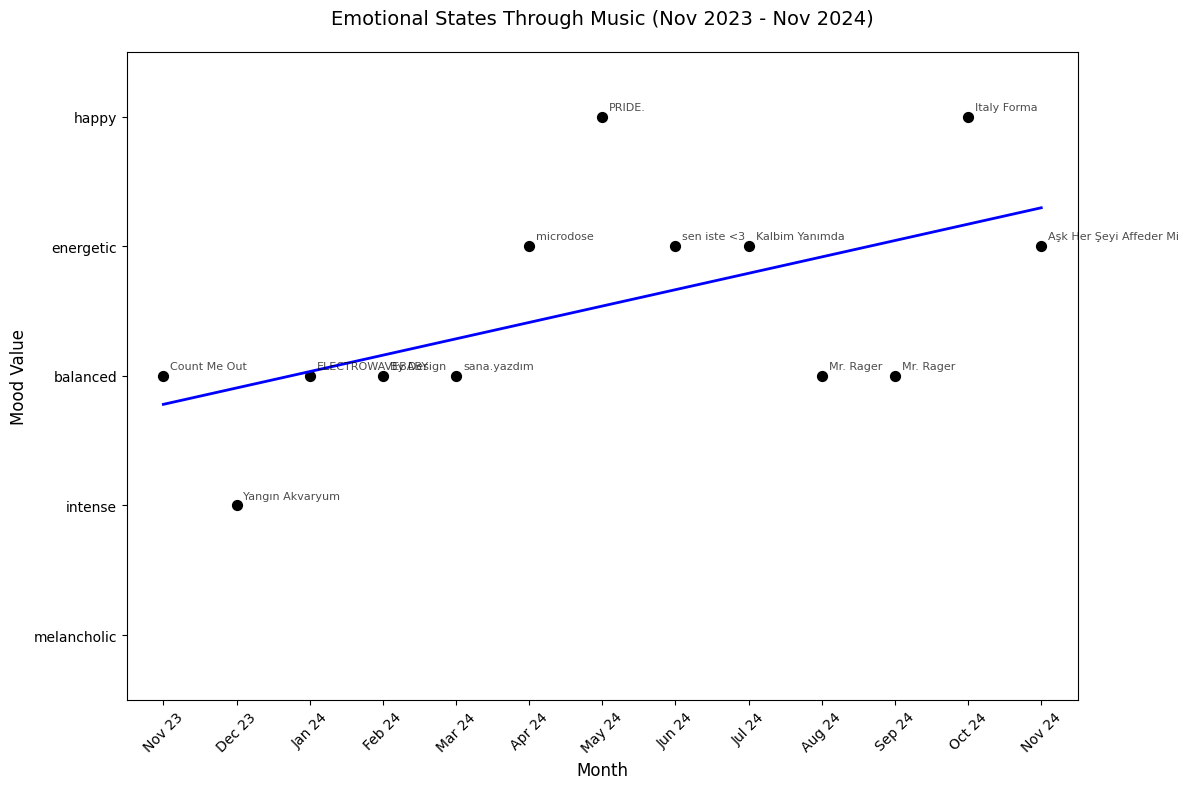


Temporal Correlation Analysis:
Correlation coefficient: 0.56
Positive correlation: Tendency towards higher energy/happier music later in the year


In [4]:
def main():
    try:
        # Load the saved analysis
        df_analysis = pd.read_csv("music_mood_analysis.csv")
        
        # Create datetime from Month column and filter for the specific range
        df_analysis['date'] = pd.to_datetime(df_analysis['Month'])
        df_analysis = df_analysis[
            (df_analysis['date'] >= '2023-11-01') & 
            (df_analysis['date'] <= '2024-11-30')
        ]
        
        # Print the data
        print("\nMonthly Emotional States Through Music:")
        for _, row in df_analysis.sort_values('date').iterrows():
            print(f"{row['Month']}: {row['trackName']} - {row['dominant_mood']}")
        
        # Create and show the correlation plot
        plot = create_month_mood_correlation_plot(df_analysis)
        plot.savefig('emotional_progression.png')
        plot.show()
        
        # Calculate correlation
        month_nums = range(1, len(df_analysis) + 1)
        correlation = np.corrcoef(month_nums,
                                df_analysis['dominant_mood'].map(MOOD_MAPPING))[0, 1]
        
        print(f"\nTemporal Correlation Analysis:")
        print(f"Correlation coefficient: {correlation:.2f}")
        
        if abs(correlation) < 0.3:
            print("Weak correlation: No strong pattern in emotional states across months")
        elif correlation > 0:
            print("Positive correlation: Tendency towards higher energy/happier music later in the year")
        else:
            print("Negative correlation: Tendency towards calmer/more melancholic music later in the year")
            
    except FileNotFoundError:
        print("Error: Please run your original Spotify analysis code first to generate the music_mood_analysis.csv file")
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()